In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import time
import datetime
from config import *
from datetime import timedelta
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)

In [2]:
client.KLINE_INTERVAL_2HOUR

'2h'

In [3]:
W = {
    1:client.KLINE_INTERVAL_1MINUTE,
    3:client.KLINE_INTERVAL_3MINUTE,
    5:client.KLINE_INTERVAL_5MINUTE,
    15:client.KLINE_INTERVAL_15MINUTE,
    30:client.KLINE_INTERVAL_30MINUTE,
    60:client.KLINE_INTERVAL_1HOUR,
    120:client.KLINE_INTERVAL_2HOUR
}

In [67]:
n = 120
elec='BTC'
L3m = client.futures_historical_klines(symbol=f'{elec}USDT',
                      interval=W[n],
                      # interval=f"{n}m",
                      start_str='2021-08-15 15:00:00',
                      end_str='2021-08-23 18:00:00'
                                      )
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
index = pd.DatetimeIndex(pd.to_datetime(arr[:, 0], unit='ms'))#.tz_localize('UTC').tz_convert('America/Lima')
df_serie = pd.DataFrame(arr[:, 3], index=index)
# df_serie

98


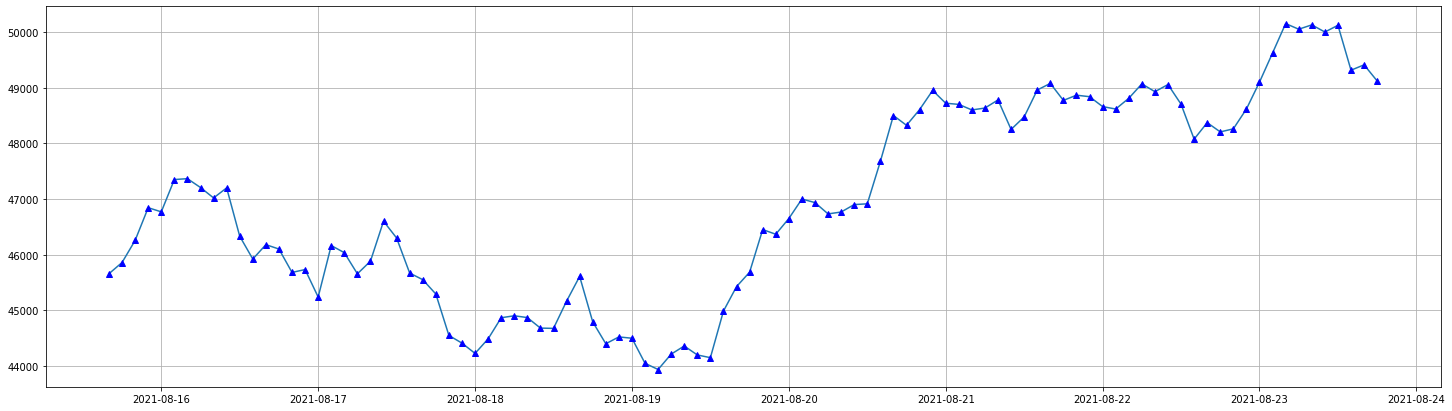

In [33]:
fig = plt.figure(figsize=(25, 7))
# df_serie.plot()
plt.plot(df_serie.index, df_serie[0])
plt.plot(df_serie.index, df_serie[0], "^", color='blue')
plt.grid()

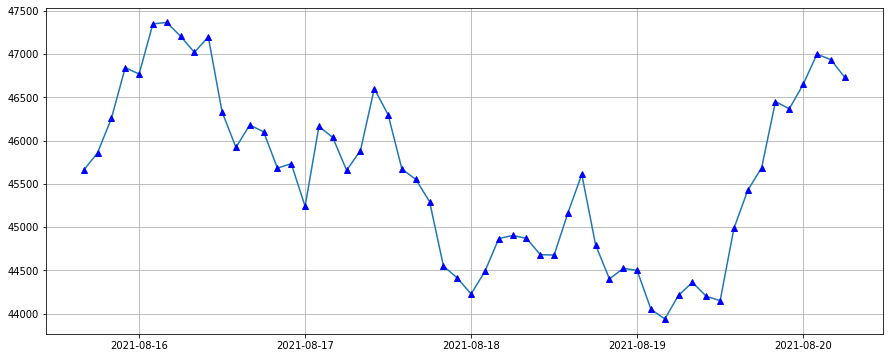

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(df_serie.iloc[:56].index, df_serie.iloc[:56][0])
plt.plot(df_serie.iloc[:56].index, df_serie.iloc[:56][0], "^", color='blue')
plt.grid()

In [55]:
df_test = df_serie.iloc[:56]
df_test

,0
2021-08-15 16:00:00,45659.10
2021-08-15 18:00:00,45860.03
2021-08-15 20:00:00,46257.21
2021-08-15 22:00:00,46844.60
2021-08-16 00:00:00,46769.91
2021-08-16 02:00:00,47350.00
2021-08-16 04:00:00,47366.00
2021-08-16 06:00:00,47206.71
2021-08-16 08:00:00,47020.00
2021-08-16 10:00:00,47200.00


In [91]:
wtf = []
values = df_test[0].to_list()
for v in values:
    print(v)

45659.1
45860.03
46257.21
46844.6
46769.91
47350.0
47366.0
47206.71
47020.0
47200.0
46331.92
45922.39
46180.56
46102.0
45682.03
45733.61
45240.0
46165.0
46036.49
45657.0
45884.79
46601.47
46300.0
45670.0
45552.01
45293.86
44550.1
44412.01
44227.32
44489.25
44868.05
44903.37
44871.0
44682.0
44677.03
45166.0
45610.0
44793.99
44401.01
44523.72
44500.0
44050.0
43938.38
44214.41
44360.51
44199.72
44151.0
44987.9
45427.01
45686.59
46451.6
46367.73
46650.0
47000.0
46936.0
46733.0


In [64]:
values[1:4]

[45860.03, 46257.21, 46844.6]

In [94]:
pcs = []
for i in range(len(values)-7):
    vals = values[i:i+7]
    avg = np.mean(vals)
    s_v = np.std(vals)
    perc = 100*v_s/avg
    print(avg, s_v, perc)
    pcs.append(perc)
    # print(s_v)

46586.69285714285 630.9933668139992 0.4694165332267421
46807.780000000006 530.350891714964 0.46719933856079104
46973.49 363.21837500718095 0.46555118334828915
47108.17428571428 218.68563855499025 0.46422015259739635
47034.934285714284 344.40725236503465 0.4649430085871528
46913.86 520.3321089732708 0.46614292355178244
46746.79714285715 540.8141122607738 0.46780881669110275
46566.22571428572 514.2912209427416 0.4696228547633854
46348.41428571429 519.7468383153245 0.47182981753573067
46164.64428571429 475.32161733946424 0.4737080550248338
45884.64428571429 341.3670164356886 0.47659874443676525
45860.798571428575 314.02536628334275 0.4768465560284249
45877.09857142857 319.7091666512177 0.47667713383074256
45802.30428571429 300.6404841504284 0.4774555384611909
45771.27428571428 278.5008978111786 0.477779222815399
45902.62285714286 397.0304956878282 0.4764120761368668
45983.53571428572 411.7814115299922 0.4755737790886122
46044.96428571428 317.57845288806305 0.47493931626924674
45957.394285

In [81]:
avg = np.mean([46844.6, 46769.91, 47350.0, 47366.0, 47206.71, 47020.0, 47200.0])
avg

47108.17428571428

In [84]:
v_s = 218.68563855499025

In [88]:
100*v_s/avg

0.46422015259739635

In [97]:
arr = np.array(pcs)
arr

array([0.46941653, 0.46719934, 0.46555118, 0.46422015, 0.46494301,
       0.46614292, 0.46780882, 0.46962285, 0.47182982, 0.47370806,
       0.47659874, 0.47684656, 0.47667713, 0.47745554, 0.47777922,
       0.47641208, 0.47557378, 0.47493932, 0.47584429, 0.4769453 ,
       0.47859584, 0.48080976, 0.48442209, 0.48721388, 0.48846063,
       0.48947371, 0.49013642, 0.48992952, 0.48951431, 0.48804934,
       0.48631167, 0.48642611, 0.48720384, 0.48774293, 0.48802593,
       0.48900345, 0.49092865, 0.49313576, 0.49382535, 0.49414622,
       0.49474147, 0.49396256, 0.49177741, 0.48903091, 0.48556063,
       0.48248873, 0.47879104, 0.47456228, 0.47171346])

In [115]:
arr[arr<0.467]

array([0.46555118, 0.46422015, 0.46494301, 0.46614292])

In [120]:
np.where(arr<0.49, [i for i in range(len(arr))])

ValueError: either both or neither of x and y should be given

In [121]:
np.where?